In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os #to iterate through directories
import cv2
import tensorflow as tf


DATADIR = ""
CATEGORIES = ["G1", "G2","G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10", "G11"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to all the gestures
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

/home/heisenberg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/heisenberg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/heisenberg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/heisenberg/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

<Figure size 640x480 with 1 Axes>

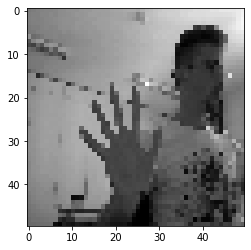

In [69]:
IMG_SIZE= 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [70]:
training_data =[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [71]:
print(len(training_data))

1315


In [72]:
import random
random.shuffle(training_data)

In [73]:
for sample in training_data[:10]:
    print(sample[1])

3
3
2
9
0
4
5
0
8
10


In [74]:
X = []
y = []

In [75]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [76]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
                  
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [77]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten, Conv2D, MaxPooling2D

In [79]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(11, activation=tf.nn.softmax))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X,y, batch_size=32,epochs = 10, validation_split=0.1)


Train on 1183 samples, validate on 132 samples
Epoch 1/10
1183/1183 [==============================] - 9s 8ms/sample - loss: 24.3261 - acc: 0.2223 - val_loss: 1.6583 - val_acc: 0.5076
Epoch 2/10
1183/1183 [==============================] - 7s 6ms/sample - loss: 1.1565 - acc: 0.6238 - val_loss: 0.9436 - val_acc: 0.6364
Epoch 3/10
1183/1183 [==============================] - 6s 5ms/sample - loss: 0.4410 - acc: 0.8538 - val_loss: 0.4947 - val_acc: 0.8712
Epoch 4/10
1183/1183 [==============================] - 5s 4ms/sample - loss: 0.1853 - acc: 0.9358 - val_loss: 0.4595 - val_acc: 0.9015
Epoch 5/10
1183/1183 [==============================] - 7s 6ms/sample - loss: 0.1308 - acc: 0.9577 - val_loss: 0.3633 - val_acc: 0.9167
Epoch 6/10
1183/1183 [==============================] - 7s 6ms/sample - loss: 0.0648 - acc: 0.9772 - val_loss: 0.5120 - val_acc: 0.8788
Epoch 7/10
1183/1183 [==============================] - 6s 5ms/sample - loss: 0.0406 - acc: 0.9873 - val_loss: 0.3406 - val_acc: 0.9470


In [80]:
model.save('epic_ges_rec.model')

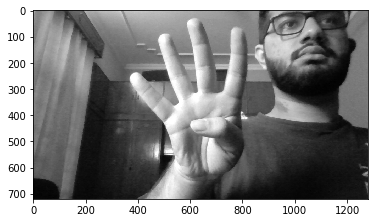

In [81]:
tst_img = cv2.imread('ges2.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(tst_img, cmap ="gray")
plt.show()

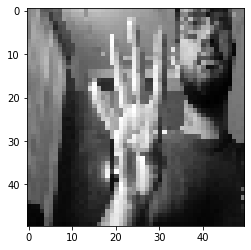

In [84]:
nw_img = cv2.resize(tst_img,(50, 50))
plt.imshow(nw_img, cmap ="gray")
plt.show()

In [85]:
arr = [nw_img]
arr = np.array(arr).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [86]:
predictions = model.predict(arr)
print(predictions[0])


[7.45688164e-11 9.83476400e-01 2.82030237e-06 1.63050164e-02
 2.15753535e-04 7.62196363e-14 6.17946672e-09 3.27819905e-09
 1.02061415e-10 8.43477857e-11 1.73345833e-15]
